# Ejercicios 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft 

## 1.- Código personal que calcula transformada de Fourier (e inversa)

In [2]:
#fdata corresponde a los valores de la función que va a transformarse 
#N es el número de puntos   
#inv es para elegir la transformada de Fourier inversa
#Se usó la definición de transformada de Fourier discreta
def Fourier(fdata, N, inv): 
    X=[0]*(N)              
    if(inv):
        omega = 2.0*np.pi/N
    else:
        omega = -2.0*np.pi/N
    for k in range(0,N):
        A,B=0.0, 0.0        
        for n in range(0,N):
            A+=fdata[n].real*np.cos(omega*n*k)+fdata[n].imag*np.sin(omega*n*k)
            B+=fdata[n].real*np.sin(omega*n*k)+fdata[n].imag*np.cos(omega*n*k)
        X[k]=complex(A,B)
    if(inv):
        for k in range(0,N):
            X[k]/=N
            
    return X 

## 2.- Transformada de Fourier de una Gaussiana

In [3]:
# Elegimos el número de puntos para la función gaussiana
N = 500
# Se elige la distancia entre puntos con T
T = 1.0 / 100.0

x = np.linspace(-10*N*T, 10*N*T, N)

#Definimos una función para obtener los valores de una gaussiana que depende de la media y sigma 
def gauss(mean,sigma,x):
    y =  np.exp(-(x-mean)**2/ 2*sigma**2)
    return y

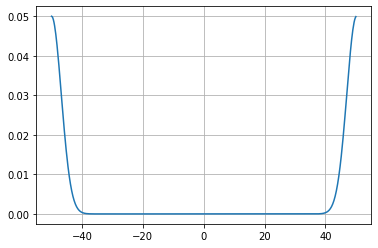

In [4]:
#graficamos los resultados obtenidos
xff = np.linspace(-1.0/(2.0*T),1.0/(2.0*T) , N)
Y=Fourier(gauss(0,1,x), N,inv=False)
plt.plot(xff,2.0/N * np.abs(Y))
plt.grid()
plt.show()

La gráfica no es lo que esperaríamos, la transformada de Fourier de una Gaussiana es otra Gaussiana, así que debemos hacer algo para interpretar estos resultados. En la información de las paqueterías mencionan que el orden de frecuencias está ordenado de tal manera que la primer mitad corresponde a las frecuencias negativas, mientras que la segunda mitad a las positivas. Si graficamos primero la segunda mitad y luego la primera encontramos una gaussiana.

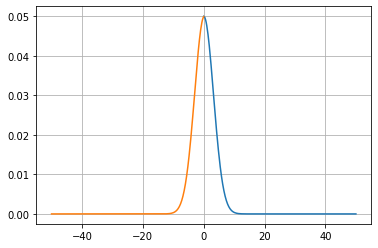

In [5]:

xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
xf2 = np.linspace(-1.0/(2.0*T),0.0 , N//2)
plt.plot(xf,2.0/N * np.abs(Y[0:N//2]))
plt.plot(xf2,2.0/N * np.abs(Y[N//2:]))
plt.grid()
plt.show()

Podemos reestructurar los datos resultantes para visualizar mejor la gráfica, cosa que voy a seguir haciendo durante el resto del trabajo

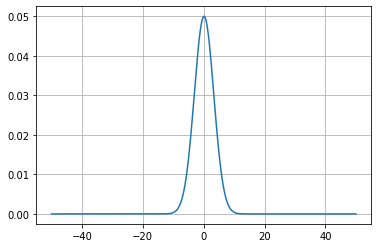

In [6]:

Y=Fourier(gauss(0,1,x), N,inv=False)
YY=np.append(2.0/N * np.abs(Y[N//2:]),2.0/N * np.abs(Y[0:N//2]))
plt.plot(xff,YY)
plt.grid()
plt.show()

### a) Transformada de Fourier de una Gaussiana para diferentes medias

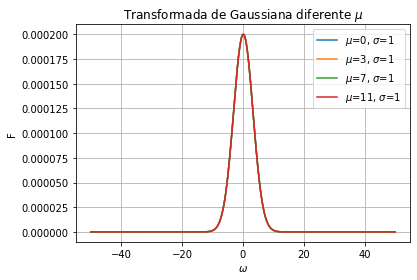

In [7]:
#Hacemos la transformada de Fourier para diferentes valores de x0 en la gaussiana, con dispersión 1

xff = np.linspace(-1.0/(2.0*T),1.0/(2.0*T) , N)


Y5=Fourier(gauss(0,1,x), N,inv=False)
YY5=np.append(2.0/N * np.abs(Y5[N//2:]),2.0/N * np.abs(Y5[0:N//2]))


Y6=Fourier(gauss(3,1,x), N,inv=False)
YY6=np.append(2.0/N * np.abs(Y6[N//2:]),2.0/N * np.abs(Y6[0:N//2]))

Y7=Fourier(gauss(7,1,x), N,inv=False)
YY7=np.append(2.0/N * np.abs(Y7[N//2:]),2.0/N * np.abs(Y7[0:N//2]))

Y8=Fourier(gauss(11,1,x), N,inv=False)
YY8=np.append(2.0/N * np.abs(Y8[N//2:]),2.0/N * np.abs(Y8[0:N//2]))

plt.plot(xff,2.0/N * np.abs(YY5), label='$\mu$=0, $\sigma$=1')
plt.plot(xff,2.0/N * np.abs(YY6), label='$\mu$=3, $\sigma$=1')
plt.plot(xff,2.0/N * np.abs(YY7), label='$\mu$=7, $\sigma$=1')
plt.plot(xff,2.0/N * np.abs(YY8), label='$\mu$=11, $\sigma$=1')
plt.grid()
plt.legend()
plt.title('Transformada de Gaussiana diferente $\mu$')
plt.ylabel('F')
plt.xlabel('$\omega$')
plt.show()



El cambiar la media de la gaussiana no afecta aparentemente la forma de la transformada de Fourier

### b) Transformada de Fourier de una Gaussiana con diferente sigma

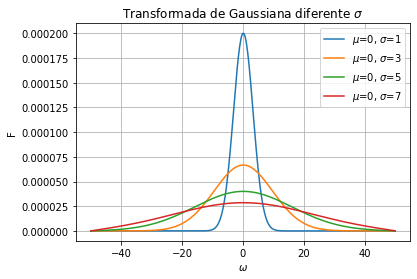

In [8]:
#Hacemos la transformada de Fourier para diferentes valores de dispersión en la gaussiana, centrada en x0=0
Y1=Fourier(gauss(0,1,x), N,inv=False)
Y2=Fourier(gauss(0,3,x), N,inv=False)
Y3=Fourier(gauss(0,5,x), N,inv=False)
Y4=Fourier(gauss(0,7,x), N,inv=False)




xff = np.linspace(-1.0/(2.0*T),1.0/(2.0*T) , N)

YY1=np.append(2.0/N * np.abs(Y1[N//2:]),2.0/N * np.abs(Y1[0:N//2]))
YY2=np.append(2.0/N * np.abs(Y2[N//2:]),2.0/N * np.abs(Y2[0:N//2]))
YY3=np.append(2.0/N * np.abs(Y3[N//2:]),2.0/N * np.abs(Y3[0:N//2]))
YY4=np.append(2.0/N * np.abs(Y4[N//2:]),2.0/N * np.abs(Y4[0:N//2]))

plt.plot(xff,2.0/N * np.abs(YY1), label='$\mu$=0, $\sigma$=1')
plt.plot(xff,2.0/N * np.abs(YY2), label='$\mu$=0, $\sigma$=3')
plt.plot(xff,2.0/N * np.abs(YY3), label='$\mu$=0, $\sigma$=5')
plt.plot(xff,2.0/N * np.abs(YY4), label='$\mu$=0, $\sigma$=7')
plt.grid()
plt.legend()
plt.title('Transformada de Gaussiana diferente $\sigma$')
plt.ylabel('F')
plt.xlabel('$\omega$')
plt.show()





A diferencia de la media, cambiar la dispersión de la Gaussiana cambia la altura del pico y el ancho de la gaussiana resultante de la transformada.

### c) Comparación del código con FFT de paqueterías 

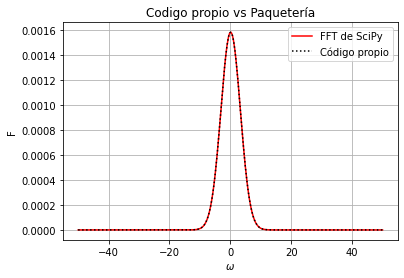

In [9]:
Y=Fourier(gauss(0,1,x), N,inv=False)
#calculamos la transformada de Fourier con la función fft de la paquetería SciPy
yf=fft(gauss(0,1,x))


y_fft = np.abs(np.fft.fftshift(yf)) / np.sqrt(2 * N)
YY=np.append(np.abs(Y[N//2:])/ np.sqrt(2 * N), np.abs(Y[0:N//2])/ np.sqrt(2 * N))

plt.plot(xff, 2.0/N * np.abs(y_fft),color='r', label='FFT de SciPy')
plt.plot(xff, 2.0/N * np.abs(YY), color='0', linestyle=':', label='Código propio')
plt.grid()
plt.legend(loc='upper right')
plt.title('Codigo propio vs Paquetería')
plt.ylabel('F')
plt.xlabel('$\omega$')
plt.show()




Los datos obtenidos de la función fft de la paquetería SciPy están en "orden estandar", según mencionan en su manual, y pueden ser reordenados con la función np.fft.fftshift de Numpy. Reordenamos los datos y graficamos la transformada de la paquetria y la que hice para la tarea notando que no hay ninguna diferencia aparente.

## 3.- y 4.- Cajas de 2 y 3 dimensiones de lado 1000 con una distribución aletatoria de puntos y un histograma de las distancias entre partículas.


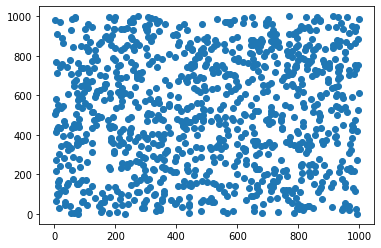

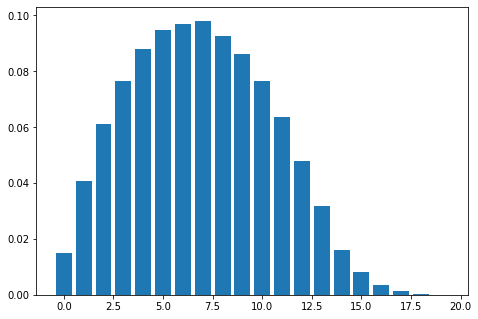

In [22]:
L=1000.0
num_bins=20
rango=np.sqrt(2)*L/num_bins
bins = [[i*rango +0.001, (i+1)*rango] for i in range(num_bins)]
cuentas = [0 for i in bins]

    
M=1000
r= np.zeros(shape=(M,2), dtype=float)
r[:,0]=np.random.uniform(0.0,L ,M)
r[:,1] = np.random.uniform(0.0,L ,M)
ax = plt.axes()
ax.scatter(r[:,0], r[:,1]);
plt.show()

for i in range(M):
    for j in range(i+1,M):              
        dr = r[j]-r[i]
        Dr = np.sqrt(sum(dr*dr))    
        bin_number = int(Dr // rango)
        cuentas[bin_number] += 1        

cuentas_norm=2*np.array(cuentas)/ (M*(M-1))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = np.arange(num_bins)

ax.bar(langs,cuentas_norm, width = 0.8)
plt.show()

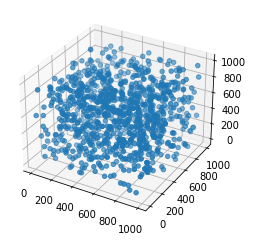

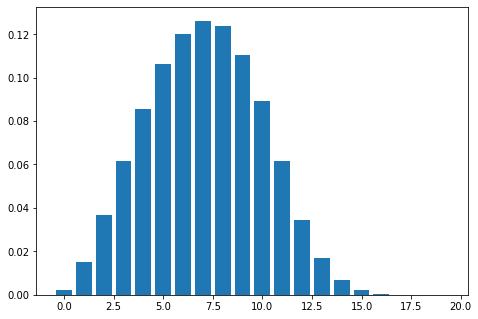

In [23]:

L2=1000.0
M2=1000
r= np.zeros(shape=(M2,3), dtype=float)
r[:,0]=np.random.uniform(0.0,L2 ,M2)
r[:,1] = np.random.uniform(0.0,L2 ,M2)
r[:,2] = np.random.uniform(0.0,L2 ,M2)


ax = plt.axes(projection='3d')
ax.scatter3D(r[:,0], r[:,1], r[:,2]);
plt.show()

num_bins=20
bin_width=np.sqrt(3)*L2/num_bins
bins = [[i*bin_width +0.001, (i+1)*bin_width] for i in range(num_bins)]
bin_counts = [0 for i in bins]



for i in range(M2):
    for j in range(i+1,M2):              
        dr = r[j]-r[i]
        Dr = np.sqrt(sum(dr*dr))   
        bin_number = int(Dr // bin_width)
        bin_counts[bin_number] += 1  

cuentas_norm=2*np.array(bin_counts)/ (M2*(M2-1))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = np.arange(num_bins)
ax.bar(langs,cuentas_norm, width = 0.8)
plt.show()
